In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
pl.style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#open census data
census = pd.read_csv('R11068625_SL050.csv')
print sum(census['TotalPopulation'])
#census.head()
#census.columns
c = census[['Qualifying Name','FIPS','TotalPopulation','Population Density (per sq. mile)', 'Area Total']]
#c.head()

285230516


In [3]:
#open vulcan data
vulcan = pd.read_csv('CountiesBySector.csv')
#vulcan.head()
#vulcan.columns
v = vulcan[['State','County','FIPS','TotalEmissions', 'Commercial', 'Industrial', 'Residential', 'Electricity Prod', 'Onroad', 'Cement', 'Aircraft', 'Airborne', 'Nonroad']]
#v

In [4]:
#MSA data
msa1 = pd.read_csv('msa1.csv')
msa2 = pd.read_csv('msa2.csv')
#print msa1.head()
#print msa2.head()

#merge MSA data by MSA/CMSA FIPS code to get MSA name
msa = pd.merge(msa1, msa2, on='MSA/CMSA FIPS', how='inner')
#msa.head(10)

#merge vulcan data and msa with FIPS code
vmsa = pd.merge(v, msa, on='FIPS', how='inner')
#vmsa

In [5]:
all = pd.merge(c, vmsa, on='FIPS', how='inner')
all.columns
#all

grouped = all.groupby(['MSA/CMSA FIPS', 'MSA_y'])
#grouped.head(10)

groups = grouped.aggregate(np.sum)
#groups
#len(groups)

#for population over 100,000
data = groups[groups['TotalPopulation'] > 100000]
len(data)

259

In [6]:
data['popden'] = data['TotalPopulation']/data['Area Total']
data['co2percap'] = data['TotalEmissions']/data['TotalPopulation']

/Users/lucyy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lucyy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
#Cleaned data - final
data.head()
data.columns

Index([u'FIPS', u'TotalPopulation', u'Population Density (per sq. mile)',
       u'Area Total', u'TotalEmissions', u'Commercial', u'Industrial',
       u'Residential', u'Electricity Prod', u'Onroad', u'Cement', u'Aircraft',
       u'Airborne', u'Nonroad', u'popden', u'co2percap'],
      dtype='object')

In [8]:
data['popden'].describe()

count     259.000000
mean      248.439888
std       185.201643
min         5.374087
25%       126.763728
50%       194.670235
75%       305.611860
max      1325.202613
Name: popden, dtype: float64

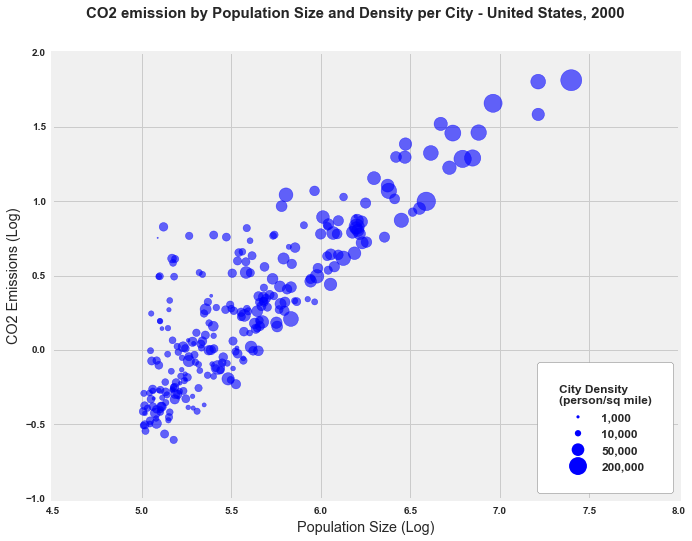

In [10]:
x = np.log10(data['TotalPopulation'])
y = np.log10(data['TotalEmissions'])

fig = plt.figure(figsize=(10, 8))

pl.scatter(x, y, s=data['popden']/3, color='b', alpha=.6)
pl.xlabel('Population Size (Log)')
pl.ylabel('CO2 Emissions (Log)')
#pl.xlim([5,7.5])
#pl.ylim([-1,2.5])
pl.suptitle('CO2 emission by Population Size and Density per City - United States, 2000', fontsize=15, fontweight='bold')
import matplotlib as mpl
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 12}
mpl.rc('font',**font)

import matplotlib.patches as mpatches
l1 = plt.scatter([],[], s=10, edgecolors='none')
l2 = plt.scatter([],[], s=40, edgecolors='none')
l3 = plt.scatter([],[], s=160, edgecolors='none')
l4 = plt.scatter([],[], s=320, edgecolors='none')

labels = ["1,000", "10,000", "50,000", "200,000"]

leg = plt.legend([l1, l2, l3, l4], labels, frameon=True, fontsize=12, 
handlelength=2, loc = "lower right", borderpad = 1.8,
handletextpad=1, title='City Density\n(person/sq mile)', scatterpoints = 1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')
savefig('co2.png')